In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/ludo/ownCloud/Programmes/quarto/biomaths_www':
  os.chdir(r'/home/ludo/ownCloud/Programmes/quarto/biomaths_www')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_401170/3972549079.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/ludo/miniconda3/lib/python3.10/importlib/_bootstrap.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/importlib/_bootstrap_external.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/codecs.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/aliases.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/__init__.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/utf_8.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/abc.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/io.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/stat.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/_collections_abc.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/genericpath.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/posixpath.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/os.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/_sitebuiltins.py": 1669299894.0, "/home/ludo/miniconda3

In [2]:
%reset -f

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [4]:
def model_malthus(etat, t, params): 
    x = etat        # unpack l'etat
    n, m = params   # unpack params -> params locaux 
    xdot = (n-m)*x  # calcule la derivee de l'etat 
    return xdot     # renvoit la derivée 

In [5]:
x0 = 0.1

etat0_malthus = np.array([x0])

In [6]:
n = 3.0     # taux de natalité
m = 2.0     # taux de mortalité

params_malthus = np.array([n, m])

In [7]:
t_0 = 0.0           # temps initial
t_fin = 10.0        # temps final
pas_t = 0.01        # pas de temps 

tspan = np.arange(start=t_0, stop=t_fin, step=pas_t)

In [8]:
int_malthus = odeint(
                model_malthus,         # système dynamique
                etat0_malthus,          # condition initiale
                tspan,                  # temps d'intégration
                args=(params_malthus,), # paramètres du syst. dyn. ici un tuple 
                                        ## à un élément (cf. virgule)
                hmax=pas_t)             # pas d'intégration max. sur temps

In [9]:
int_malthus[:5]

array([[0.1       ],
       [0.10100502],
       [0.10202014],
       [0.10304547],
       [0.10408109]])

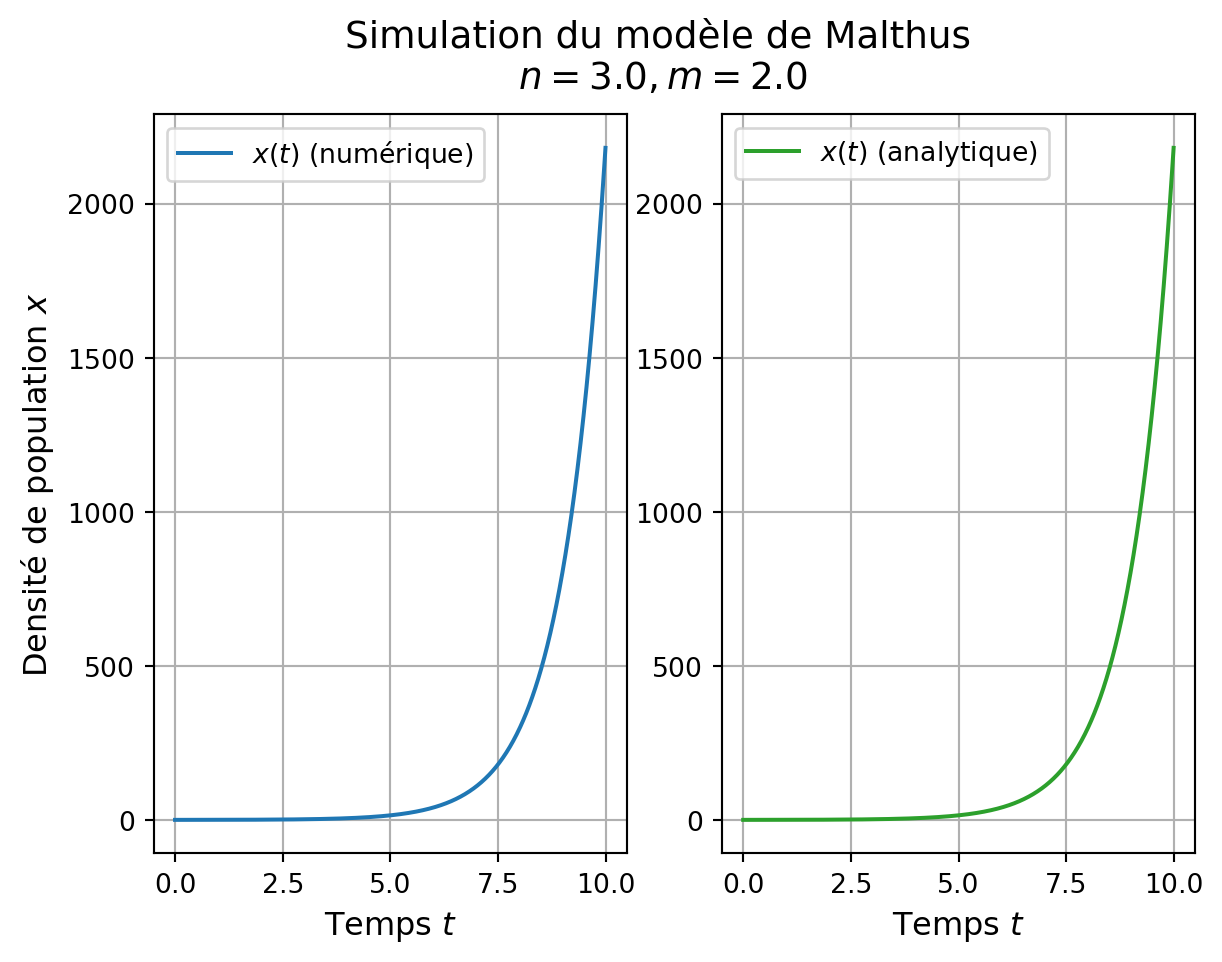

In [10]:
#| label: fig-malthus
#| fig-cap: simulation et solution mathématique du modèle de Malthus (@eq-malthus)

## figure et systèmes d'axes
fig1, (ax1, ax2) = plt.subplots(1, 2)  

## titre de la figure
fig1.suptitle('Simulation du modèle de Malthus\n $n = {}, m = {}$'.format(n, m), 
              va='top', fontsize='14')

## premier subplot
ax1.plot(tspan, int_malthus, 
         color='C0', 
         label='$x(t)$ (numérique)')

## modification des bornes
ax1.set_ylim(bottom=None, top=None)

## axes / légendes / grille
ax1.legend(fontsize='10')
ax1.set_xlabel('Temps $t$', fontsize='12')
ax1.set_ylabel('Densité de population $x$', fontsize='12')
ax1.grid()


## second subplot
ax2.plot(tspan, np.exp((n-m)*tspan)*x0, 
         color='C2', 
         label='$x(t)$ (analytique)')

## axes / légendes / grille
ax2.legend(fontsize='10')
ax2.set_xlabel('Temps $t$', fontsize='12')
ax2.grid()

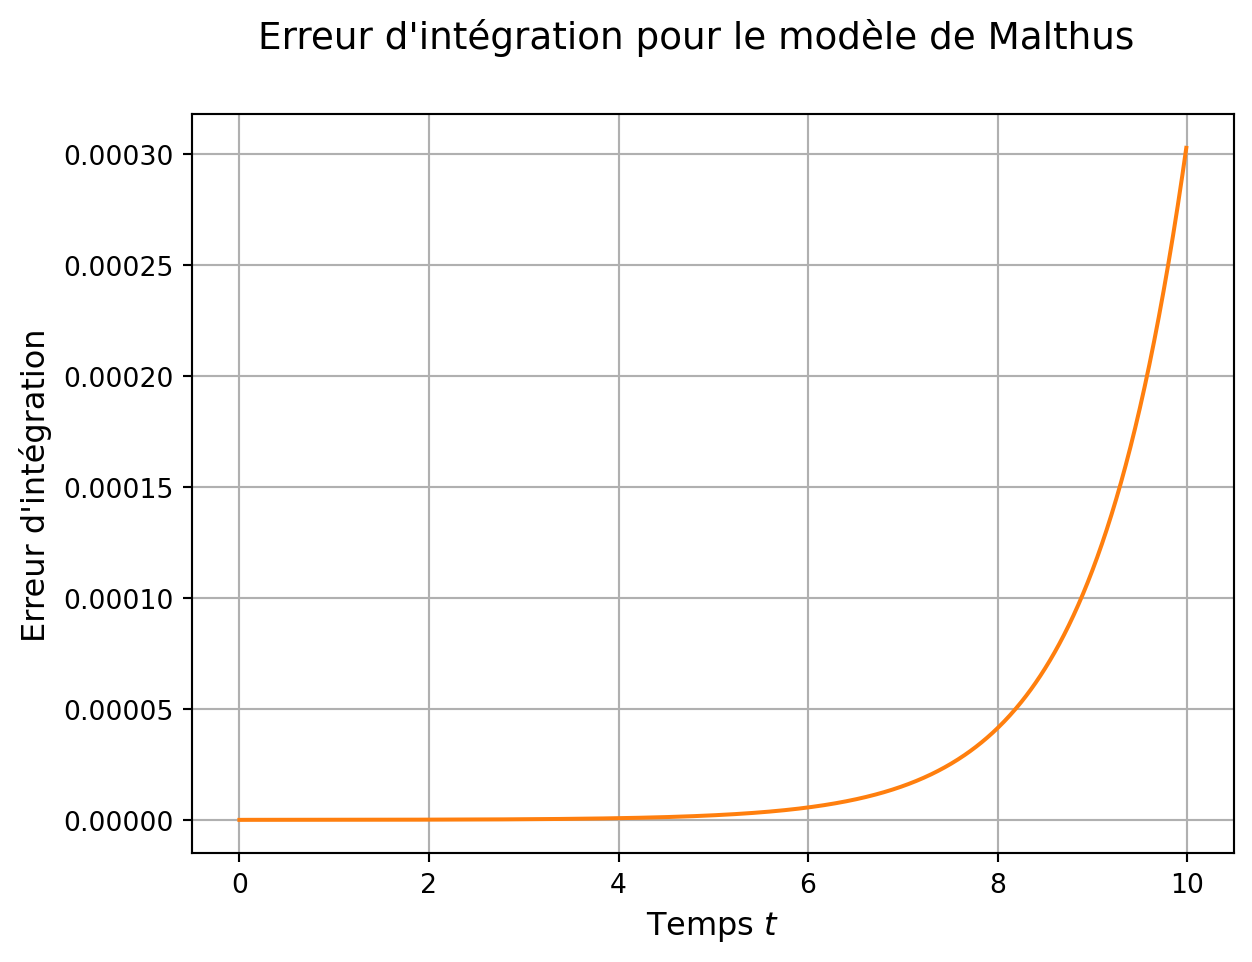

In [11]:
#| label: fig-erreur-malthus
#| fig-cap: Erreur à l'intégration numérique du modèle de Malthus (@eq-malthus)
#| code-fold: true

fig2, ax3 = plt.subplots(1, 1)
ax3.plot(tspan, 
         int_malthus[:,0]-np.exp((n-m)*tspan)*x0, 
         color='C1', 
         label='$x(t)$ (numérique)')

fig2.suptitle('Erreur d\'intégration pour le modèle de Malthus', 
            va='top', fontsize='14')
ax3.set_xlabel('Temps $t$', fontsize='12')
ax3.set_ylabel('Erreur d\'intégration', fontsize='12')
ax3.grid()

In [12]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [13]:
#| code-fold: true

def model_logistic(etat, t, params): 
    x = etat        
    r, K = params   
    xdot = r*x*(1-x/K)  
    return xdot     

In [14]:
#| code-fold: true

## condition initiale
x0 = 0.1
etat0_logistic = np.array([x0])

## paramètres
r = 1.0     # taux de croissance intrinsèque
K = 10.0    # capacité de charge
params_logistic = np.array([r, K])

## tspan
t_0 = 0.0           
t_fin = 10.0        
pas_t = 0.01        
tspan = np.arange(t_0, t_fin, pas_t)

In [15]:
#| code-fold: true

int_logistic = odeint(
                model_logistic,        
                etat0_logistic,         
                tspan,                  
                args=(params_logistic,),
                hmax=pas_t)             

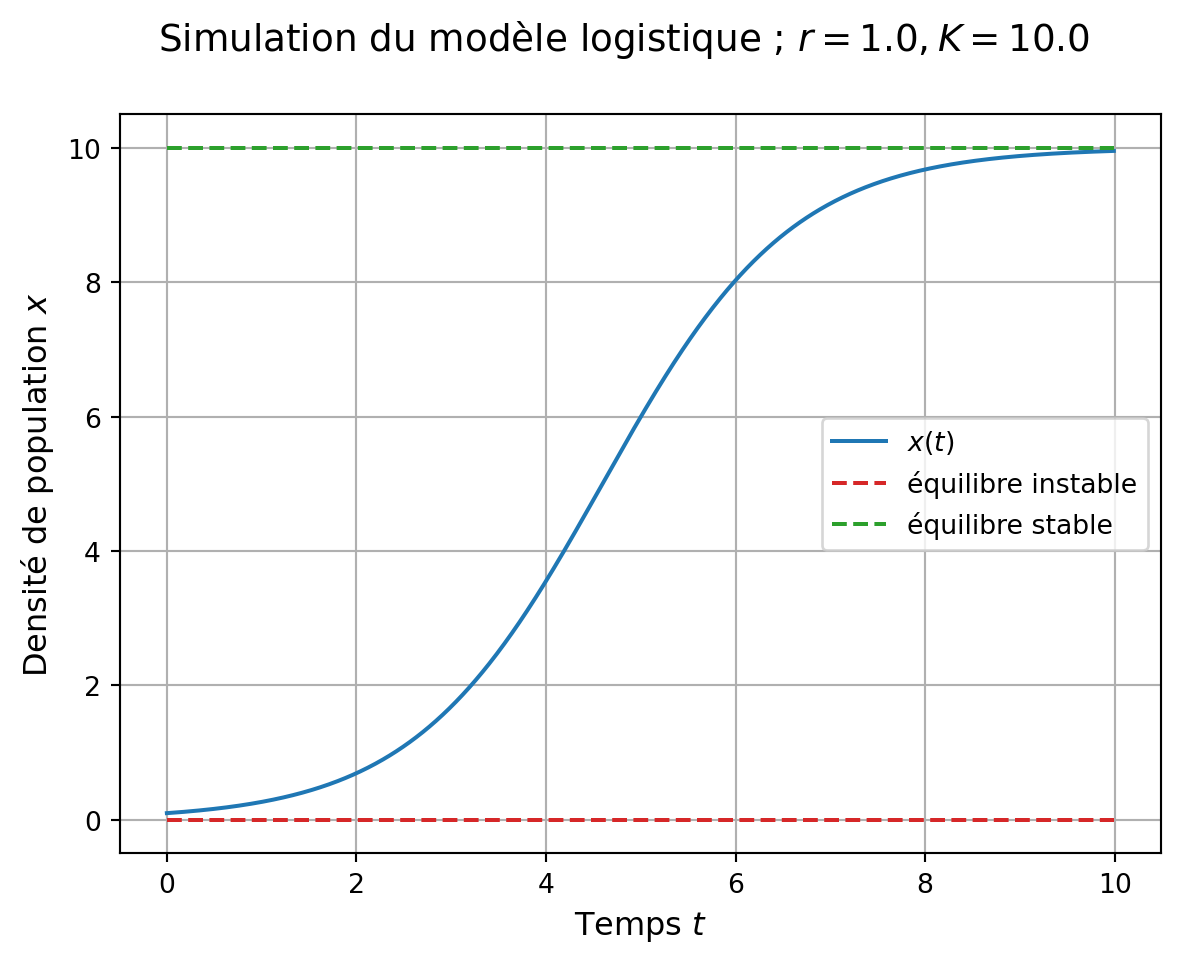

In [16]:
#| code-fold: true
#| label: fig-logistic
#| fig-cap: simulation du modèle logistique (@eq-logistic)

## figure et systèmes d'axes
fig, ax = plt.subplots(1, 1)  

## titre de la figure
fig.suptitle('Simulation du modèle logistique ; $r = {}, K = {}$'.format(r, K), 
              va='top', fontsize='14')

## simulation
ax.plot(tspan, int_logistic, 
         color='C0', 
         label='$x(t)$') # solution

## équilibres
ax.plot(tspan, np.zeros_like(tspan),
        color = 'C3',
        linestyle = 'dashed',
        label = "équilibre instable")
ax.plot(tspan, np.ones_like(tspan)*K,
        color = 'C2',
        linestyle = 'dashed',
        label = "équilibre stable")

## modification des bornes
ax.set_ylim(bottom=None, top=None)

## axes / légendes / grille
ax.legend(fontsize='10')
ax.set_xlabel('Temps $t$', fontsize='12')
ax.set_ylabel('Densité de population $x$', fontsize='12')
ax.grid()

In [17]:
#| code-fold: true
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [18]:
#| code-fold: true

def model_allee(etat, t, params): 
    x = etat        
    r, K, epsilon = params   
    xdot = r*x*(x/epsilon-1)*(1-x/K)  
    return xdot     

In [19]:
#| code-fold: true

## paramètres
r = 1.0       # taux de croissance intrinsèque
epsilon = 2.0 # seuil de Allee
K = 10.0      # capacité de charge
params_allee = np.array([r, K, epsilon])

## tspan
t_0 = 0.0           
t_fin = 3.0        
pas_t = 0.01        
tspan = np.arange(t_0, t_fin, pas_t)

In [20]:
def int_allee(x0, tspan=tspan, params=params_allee):
    sim_allee = odeint(
                model_allee,        
                x0,             # argument de la fonction 
                tspan,          # argument de la fonction 
                args=(params,), # argument de la fonction 
                hmax=pas_t)
    return sim_allee

In [21]:
int_allee(0.1)[:5,0]

array([0.1       , 0.09906363, 0.09813549, 0.09721551, 0.09630365])

In [22]:
x0_step = 1.35
x0_arr = np.arange(x0_step, K, x0_step)

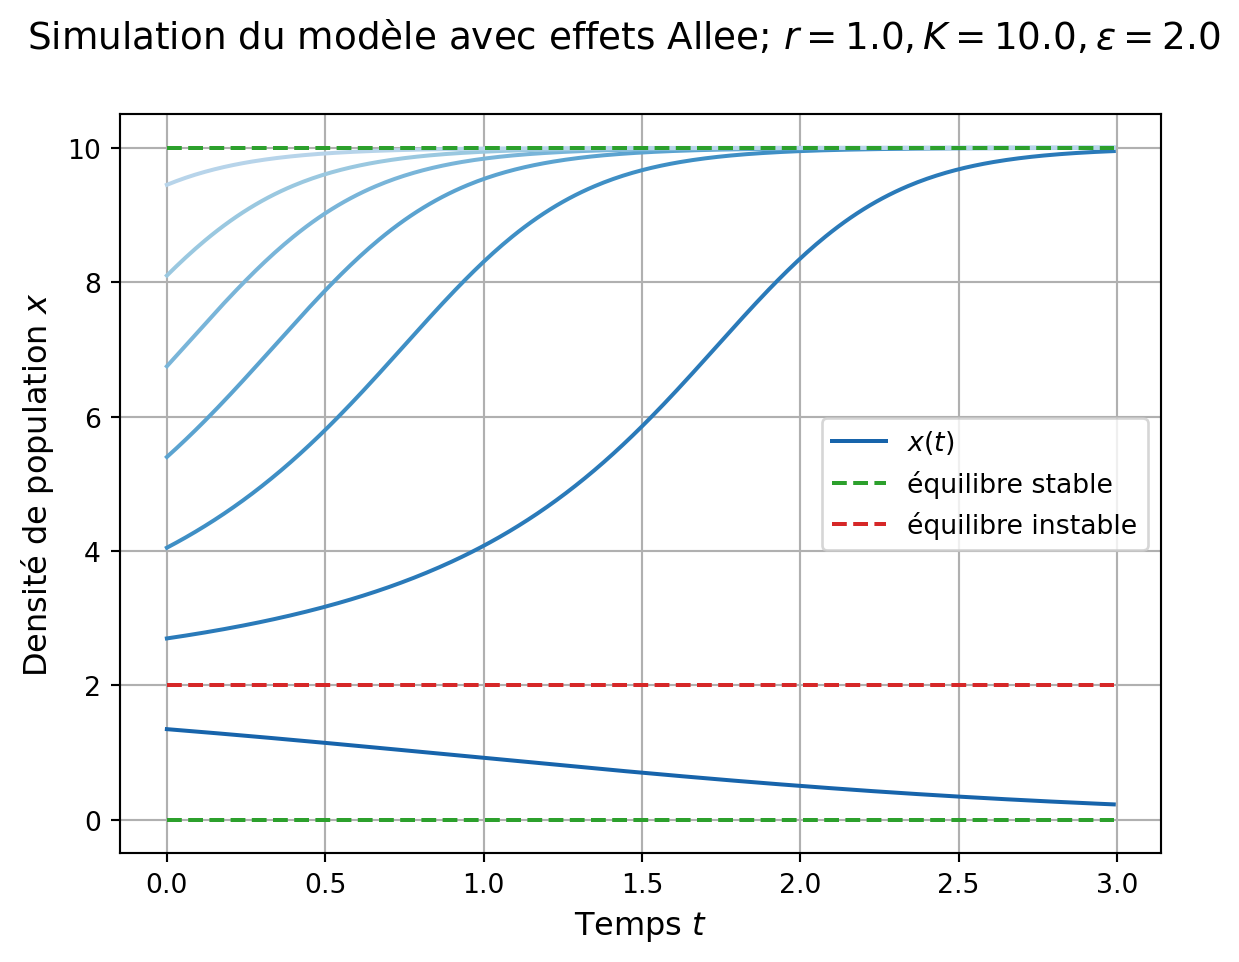

In [23]:
#| label: fig-allee
#| fig-cap: simulation du modèle avec effets Allee forts (@eq-allee)
fig, ax = plt.subplots(1, 1)  
fig.suptitle('Simulation du modèle avec effets Allee'\
    '; $r={}, K={}, \epsilon={}$'.format(r, K, epsilon), 
              va='top', fontsize='14')

## redéfinition du cycle des couleurs pour un dégradé de bleu
colorAllee = plt.cm.Blues(np.linspace(.8, .3, x0_arr.shape[0]))
ax.set_prop_cycle(color = colorAllee)

## simulations
ax.plot(tspan, int_allee(x0_arr[0]),
        label = "$x(t)$")
for x0 in x0_arr[1:]:       # x0 parcour x0_arr
    ax.plot(tspan, int_allee(x0)) 

## équilibres
ax.plot(tspan, np.zeros_like(tspan),
        color = 'C2',
        linestyle = 'dashed',
        label = "équilibre stable")
ax.plot(tspan, np.ones_like(tspan)*K,
        color = 'C2',
        linestyle = 'dashed')
ax.plot(tspan, np.ones_like(tspan)*epsilon,
        color = 'C3',
        linestyle = 'dashed',
        label = "équilibre instable")

## axes / légendes / grille
ax.legend(fontsize='10')
ax.set_xlabel('Temps $t$', fontsize='12')
ax.set_ylabel('Densité de population $x$', fontsize='12')
ax.grid()